# Test the implementation of staggered grid. Visualize all variables.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib


# Get the parent directory of the current file
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)


import solvers
importlib.reload(solvers)
import utils
importlib.reload(utils)
import staggered_grid
importlib.reload(staggered_grid)

<module 'staggered_grid' from 'd:\\PhD at UCLA\\Spring 2025\\MAE-250H\\staggered_grid.py'>

In [42]:
'''
Create staggered grid for all the operators
'''
Lx = 1
Ly = 1
Nx = 10
Ny = 10

In [43]:
'''
Initial conditions
'''
def initial_condition_velocity(u_mesh_grid, v_mesh_grid):
    Xu, Yu = u_mesh_grid
    Xv, Yv = v_mesh_grid
    u = np.sin(2 * np.pi * Xu) * np.cos(2 * np.pi * Yu)
    v = np.sin(2 * np.pi * Xv) * np.cos(2 * np.pi * Yv)
    return u, v

def initial_condition_pressure(pressure_mesh_grid):
    X, Y = pressure_mesh_grid
    p = np.sin(2 * np.pi * X) * np.sin(2 * np.pi * Y)
    return p


In [44]:
grid = staggered_grid.StaggeredGrid(Lx, Ly, Nx, Ny, initial_condition_velocity, initial_condition_pressure).get_grid()
spatial_mesh_grid, pressure_mesh_grid, u_mesh_grid, v_mesh_grid, vorticity_mesh_grid = grid
grids = [spatial_mesh_grid, pressure_mesh_grid, u_mesh_grid, v_mesh_grid, vorticity_mesh_grid]

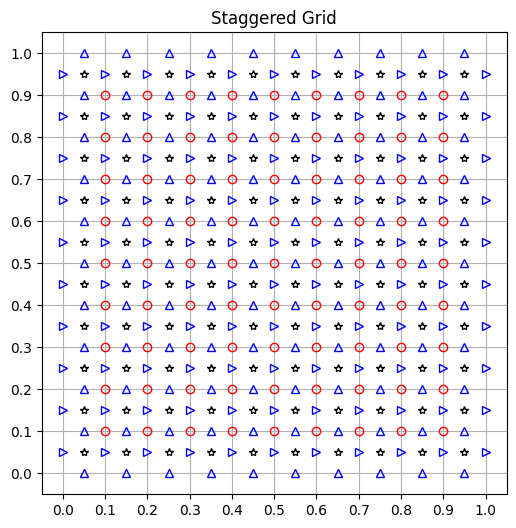

In [45]:
markers = ['P', '*', '>', '^', 'o']
marker_edge_color = ['black', 'black', 'blue', 'blue', 'red']
fig, ax = plt.subplots(figsize=(6, 6))
# Use the spatial mesh grid to plot the grid
X, Y = spatial_mesh_grid

x_ticks = X[0, :]
y_ticks = Y[:, 0]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)



for i in range(1, len(grids)):
    X_plot, Y_plot = grids[i]

    plt.plot(X_plot, Y_plot, markers[i], markerfacecolor='none', markeredgecolor=marker_edge_color[i])

plt.title('Staggered Grid')
plt.grid(axis='both')
# plt.legend(["Pressue Mesh Grid", "u Mesh Grid", "v Mesh Grid", "Vorticity Mesh Grid"])
plt.show()

# Test the initial condition

In [46]:
'''
Create another staggered grid for all the operators
'''
Lx = 1
Ly = 1
Nx = 20
Ny = 20

In [47]:
grid_finer = staggered_grid.StaggeredGrid(Lx, Ly, Nx, Ny, initial_condition_velocity, initial_condition_pressure)

### Vorticity visualization

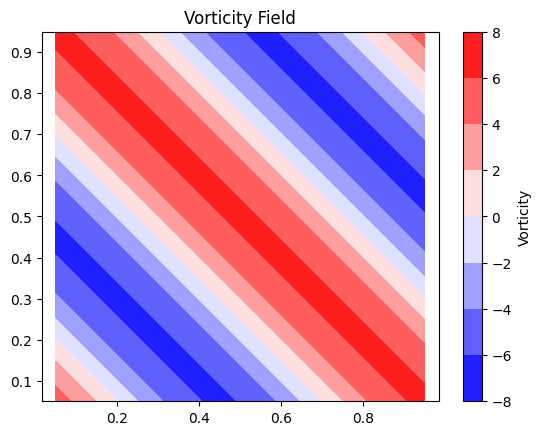

In [48]:
'''
Vorticity visualization
'''
grid_finer.visualize_vorticity()

### Pressure visualization

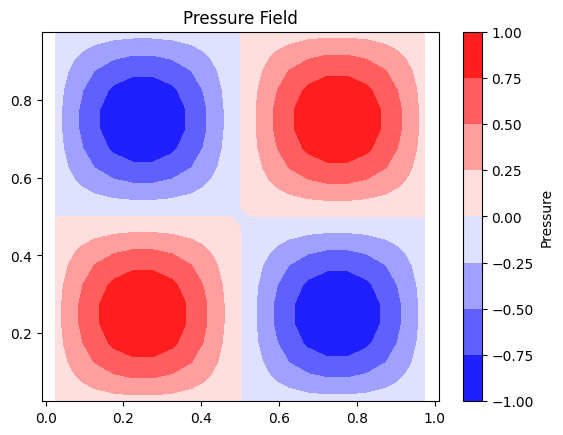

In [49]:
'''
Pressure visualization
'''
grid_finer.visualize_pressure()

### Velocity field visualization

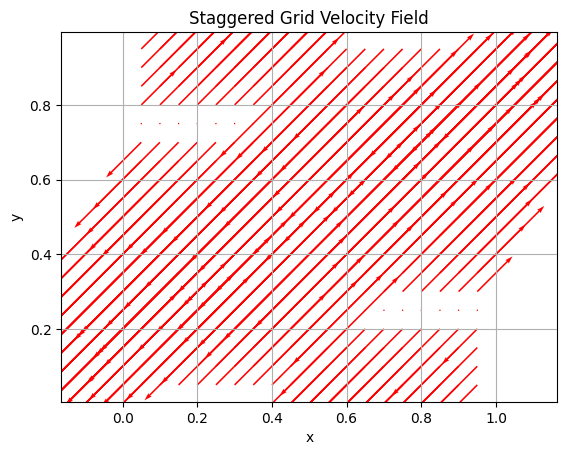

In [50]:
'''
Velocity field visualization
'''
grid_finer.visualize_velocity()
